In [1]:
import warnings
import os

import seaborn as sns
import pandas as pd
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
warnings.filterwarnings('ignore', 'is_categorical_dtype')
warnings.filterwarnings('ignore', 'use_inf_as_na')

In [3]:
sns.set_theme()

In [4]:
working_dir = 'Z:/landscape_geoinfo/2024_ditches/working/paper_materials'
os.chdir(working_dir)

In [5]:
# Plot experiment results
def plot_experiment_results(experiment_dir, metric, ax):
    
    # Read results
    result_pkl_path = f'{experiment_dir}/result/result.pkl'
    results = pd.read_pickle(result_pkl_path)
    results['BinaryF1Score'] = results['BinaryF1Score'].astype('float')
    results['BinaryAccuracy'] = results['BinaryAccuracy'].astype('float')
    results['BinaryPrecision'] = results['BinaryPrecision'].astype('float')
    results['BinaryRecall'] = results['BinaryRecall'].astype('float')
    
    # Extract test results and sort by loss and F1 score
    test_results = results[results['Train_Test'] == 'Test'].reset_index(drop=True)
    test_results['BinaryF1Score'] = test_results['BinaryF1Score'].astype(float)
    test_results = test_results.sort_values(by=['loss', 'BinaryF1Score'], ascending=[True, False])
    
    # Get best epoch
    best_epoch = test_results.head(1)['Epoch'].values[0]
    
    # Get best metric value
    best_metric = test_results.head(1)[metric].values[0]
    
    # Plot metric
    palette = sns.color_palette('deep').as_hex()[:len(results['Train_Test'].unique())]
    sns.lineplot(data=results, x='Epoch', y=metric, hue='Train_Test', palette=palette, ax=ax)
    
    # Add point to best metric coordinates
    sns.lineplot(x=[best_epoch], y=[best_metric], color=palette[-1], marker='o', markersize=5, ax=ax)
    
    # Annotate point
    ax.annotate(
        format(round(best_metric, 3), ".3f"),
        (best_epoch, best_metric),
        textcoords='offset points',
        xytext=(0, 5),
        ha='center',
        weight='bold',
        color=palette[-1], 
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')]
    )
    
    return ax

In [6]:
# Input parameters for plots
metrics = ['loss', 'BinaryF1Score']
train_augmentations = ['unaug', 'aug']
kernel_sizes = [3, 5, 7]

# Plot pretraining results

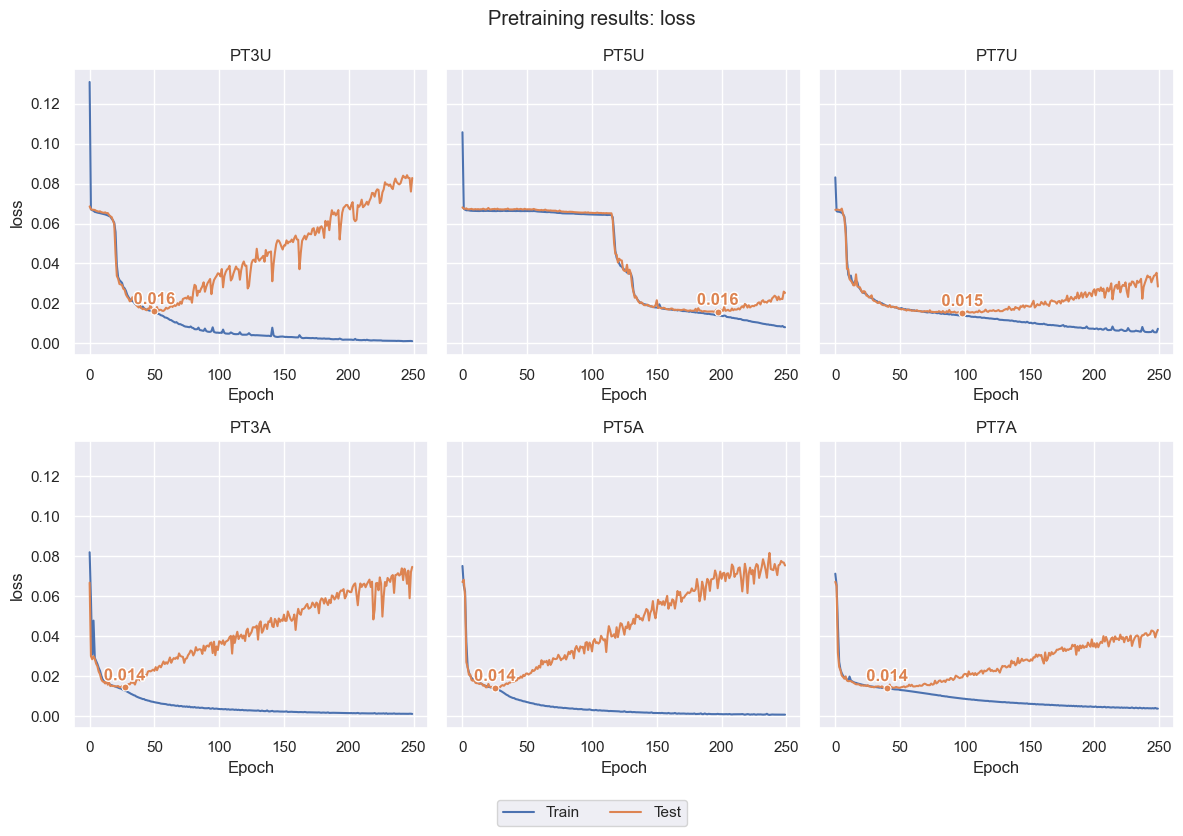

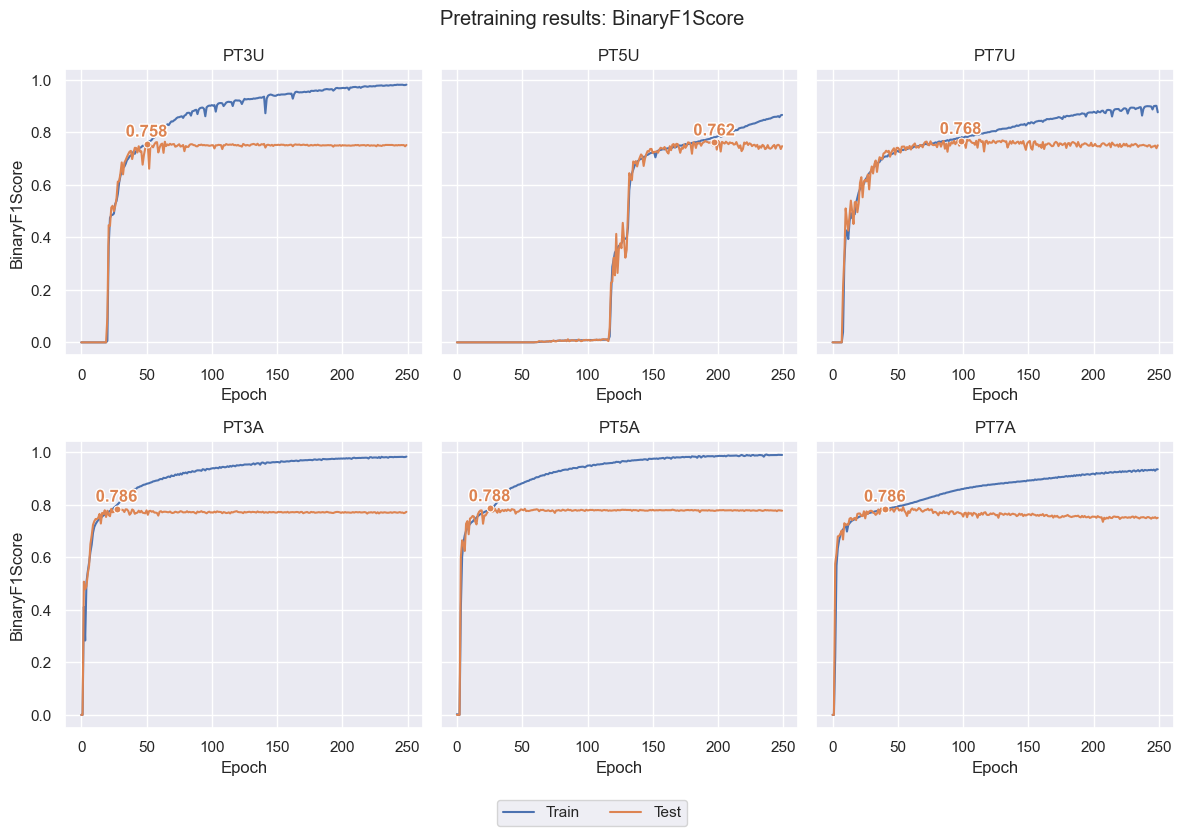

In [7]:
for metric in metrics:
    fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)
    for i in range(len(train_augmentations)):
        aug = train_augmentations[i]
        for j in range(len(kernel_sizes)):
            ks = kernel_sizes[j]
            experiment = f'train_{aug}_sweden_test_unaug_sweden_relu_ks{ks}x{ks}_lr0.0001_250ep_bs4'
            experiment_dir = f'Z:/landscape_geoinfo/2024_ditches/working/pytorch_unet/experiments/{experiment}'
            model_name = f'PT{ks}{aug[0].upper()}'
            ax = axes[i][j]
            ax.set_title(model_name)
            try:
                plot_experiment_results(experiment_dir, metric, ax=ax)
                ax.get_legend().set_visible(False)
            except:
                pass
    fig.suptitle(f'Pretraining results: {metric}')
    plt.tight_layout()
    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))
    plt.savefig(f'./figures/pretraining_results_{metric}.png', dpi=300, bbox_inches='tight')

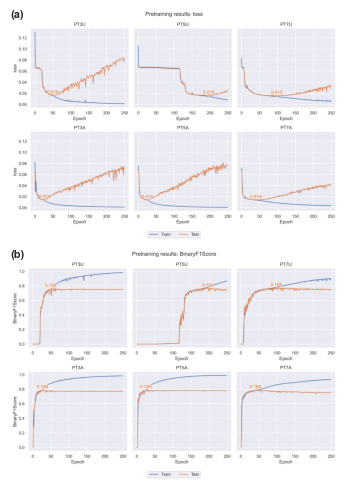

In [8]:
# Combine plots
images = [f'./figures/pretraining_results_{metric}.png' for metric in metrics]
letters = ['(a)', '(b)']
fig, axes = plt.subplots(2, 1, layout='compressed')
for image, letter, ax in zip(images, letters, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0, 1, letter, transform=ax.transAxes, fontsize=8, fontweight='bold', verticalalignment='top')
plt.savefig(f'./figures/pretraining_results_{metrics[0]}_{metrics[1]}.png', dpi=300, bbox_inches='tight')

# Plot finetuning results

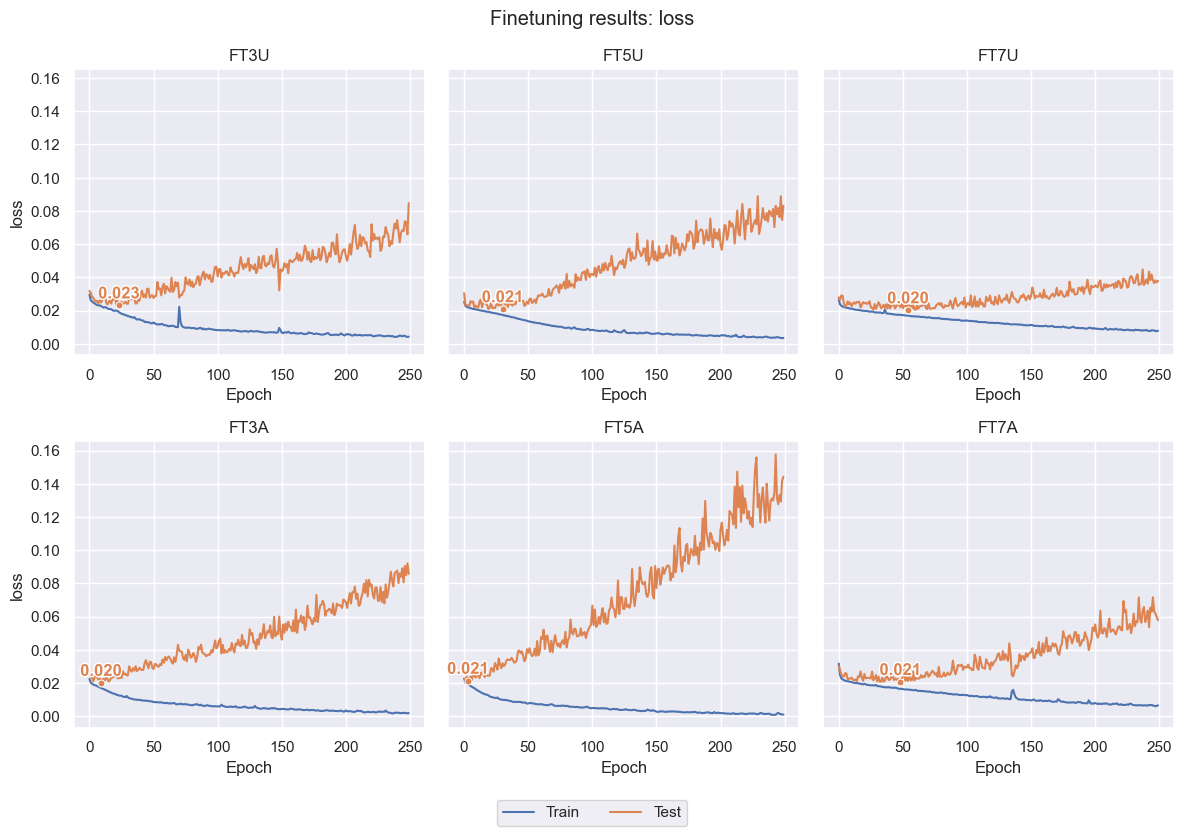

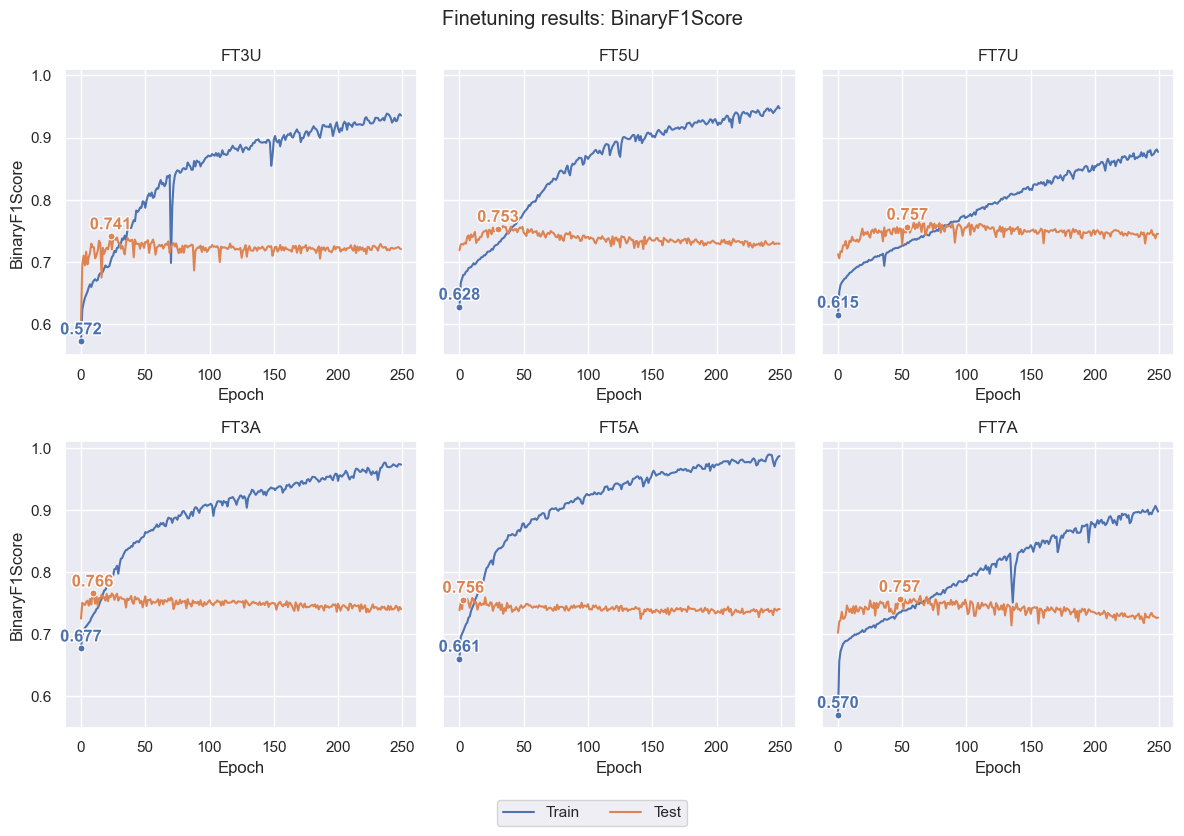

In [9]:
for metric in metrics:
    fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)
    for i in range(len(train_augmentations)):
        aug = train_augmentations[i]
        for j in range(len(kernel_sizes)):
            ks = kernel_sizes[j]
            experiment = f'finetuned_aug_estonia_relu_ks{ks}x{ks}_lr0.0001_250ep_bs4_from_train_{aug}_sweden_test_unaug_sweden'
            experiment_dir = f'Z:/landscape_geoinfo/2024_ditches/working/pytorch_unet/experiments/{experiment}'
            model_name = f'FT{ks}{aug[0].upper()}'
            ax = axes[i][j]
            ax.set_title(model_name)
            try:
                plot_experiment_results(experiment_dir, metric, ax=ax)
                ax.get_legend().set_visible(False)
                if metric == 'BinaryF1Score':
                    result_pkl_path = f'{experiment_dir}/result/result.pkl'
                    results = pd.read_pickle(result_pkl_path)
                    results[metric] = results[metric].astype('float')
                    palette = sns.color_palette('deep').as_hex()[:len(results['Train_Test'].unique())]
                    x = [0]
                    y = [results[results['Train_Test'] == 'Train'].reset_index(drop=True).head(1)[metric].values[0]]
                    sns.lineplot(x=x, y=y, color=palette[0], marker='o', markersize=5, ax=ax, legend=False)
                    ax.annotate(
                        format(round(y[0], 3), ".3f"),
                        (x[0], y[0]),
                        textcoords='offset points',
                        xytext=(0, 5),
                        ha='center',
                        weight='bold',
                        color=palette[0], 
                        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')]
                    )
            except:
                pass
    fig.suptitle(f'Finetuning results: {metric}')
    plt.tight_layout()
    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))
    plt.savefig(f'./figures/finetuning_results_{metric}.png', dpi=300, bbox_inches='tight')

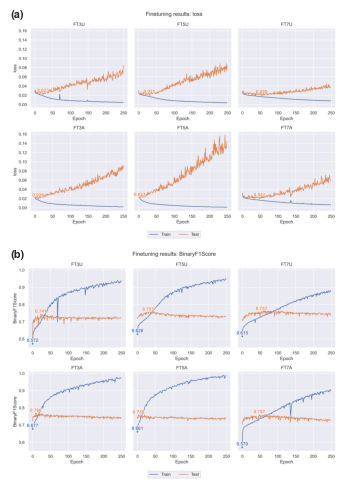

In [10]:
# Combine plots
images = [f'./figures/finetuning_results_{metric}.png' for metric in metrics]
letters = ['(a)', '(b)']
fig, axes = plt.subplots(2, 1, layout='compressed')
for image, letter, ax in zip(images, letters, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0, 1, letter, transform=ax.transAxes, fontsize=8, fontweight='bold', verticalalignment='top')
plt.savefig(f'./figures/finetuning_results_{metrics[0]}_{metrics[1]}.png', dpi=300, bbox_inches='tight')